<a href="https://colab.research.google.com/github/Gerundio98/Cedula.Desarrollo-de-Software-II/blob/main/Notebook_Bloque_2_(Completado)_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducci√≥n al Aprendizaje Autom√°tico.**
### **Bloque 2 -** *Redes Neuronales Artificiales*

---
*Consejos de uso de Google Colab:*

*   Puedes consultar la documentaci√≥n sobre una funci√≥n escribiendo **?** justo despu√©s de una funci√≥n: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una funci√≥n.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*


## üìà **Regresi√≥n con Redes Neuronales Artificiales**

<p align="justify">Tras varios ejercicios trabajando con los modelos cl√°sicos que la librer√≠a Sklearn nos ofrece, hoy vamos a avanzar en el mundo del aprendizaje autom√°tico en su vertiente m√°s moderna: <b>El Aprendizaje Profundo</b> (a.k.a <i>Deep Learning</i>)

<p align="justify">Para ello vamos a retomar dos de los ejercicios practicados, uno de regresi√≥n y uno de clasificaci√≥n, para aprender c√≥mo podemos dise√±ar y entrenar redes neuronales sencillas que nos resuelvan la tarea, con <b>Sklearn</b> y con <b>Keras</b>. Con Sklearn podremos dise√±ar redes m√°s sencillas que nos resuelvan la tarea r√°pidamente. Por el contrario, con Keras tendremos mayor flexibilidad y potencia para dise√±ar redes neuronales m√°s avanzadas. ¬°Vamos a verlo!

<p align="justify">Para ello, lo primero que tendremos que hacer ser√° cargar nuevamente los datos:

In [ ]:
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt

# Volvemos a cargar el Boston Housing Dataset.
from sklearn.datasets import fetch_openml
boston_dataset = fetch_openml(name='boston', version=1)

# y generamos las variables de entrada y salida, X e Y.
X = boston_dataset.data
Y = boston_dataset.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<p align="justify">Adem√°s, para aprovechar las t√©cnicas de An√°lisis Exploratorio de Datos vistas en bloques anteriores, vamos a cargar los datos  en un DataFrame de Pandas para, en combinaci√≥n con Seaborn, visualizarlos mejor.

In [ ]:
import pandas as pd

# Creamos un DataFrame de Pandas con todos nuestros datos.
data = pd.DataFrame(X, columns=boston_dataset.feature_names)

# A√±adimos a la tabla tambi√©n la columna de salida Y.
data["MDEV"] = Y

# Visualizamos el contenido de la tabla.
display(data)

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  MDEV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

<p align="justify">Por ejemplo, podemos preguntarnos <b>¬øQu√© tan correlacionadas est√°n nuestras variables?</b> Para averiguar esto, vamos a visualizar la matriz de correlaci√≥n de las variables de entrada.

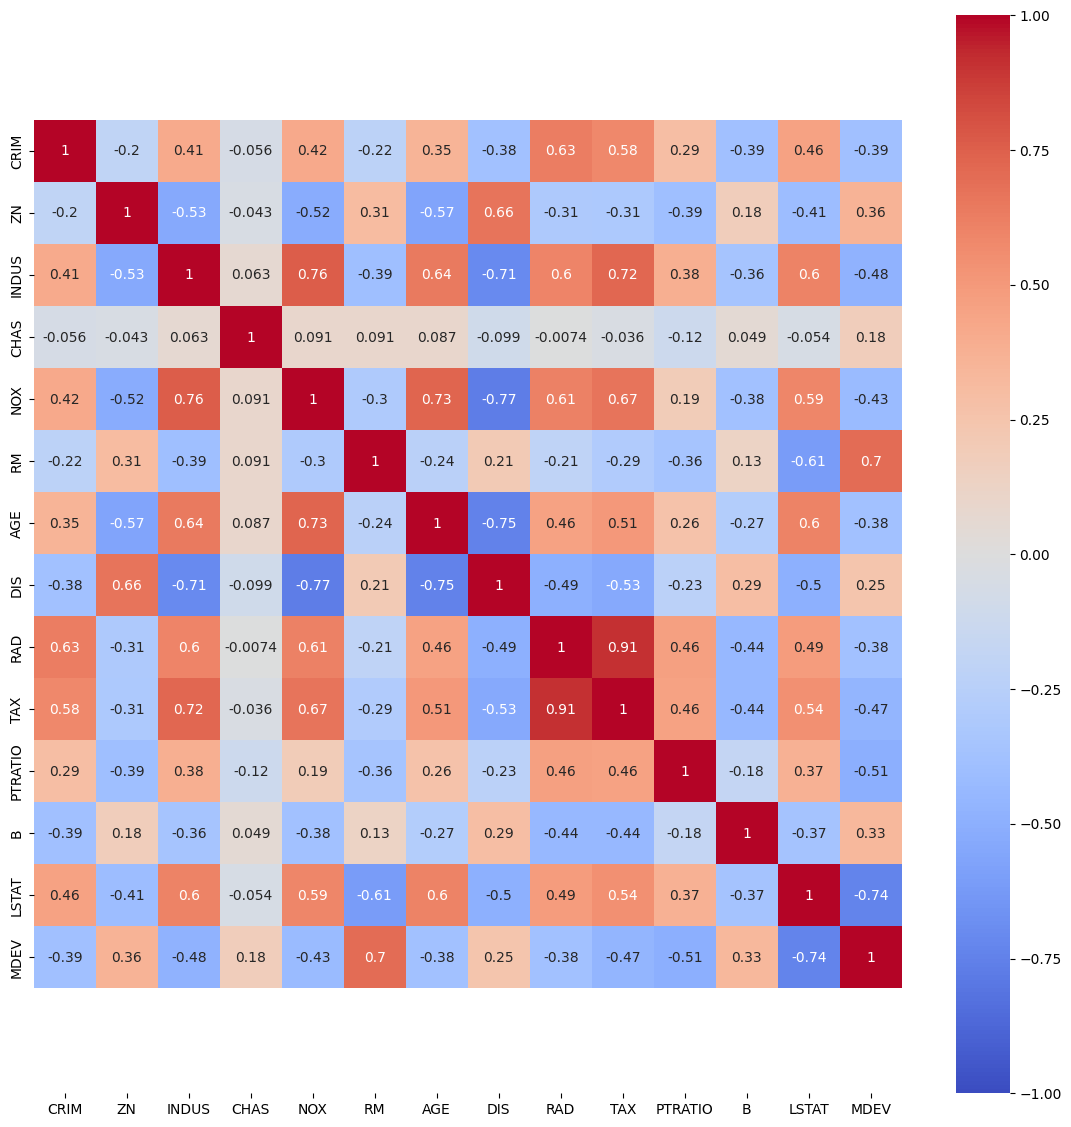

In [ ]:
import seaborn as sb

# Visualizamos el mapa de calor de la matriz de correlaci√≥n.
plt.figure(figsize=(14, 14))
sb.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.axis("equal")
plt.show()

<p align="justify">Otra pregunta que podemos responder es <b>¬øSe distribuyen en el mismo rango nuestras variables?</b> Para descubrir esto, vamos a visualizar un <i>Boxplot</i> que nos muestre cu√°l es el rango de distribuci√≥n de cada una de las variables de nuestra tabla.

<Axes: >

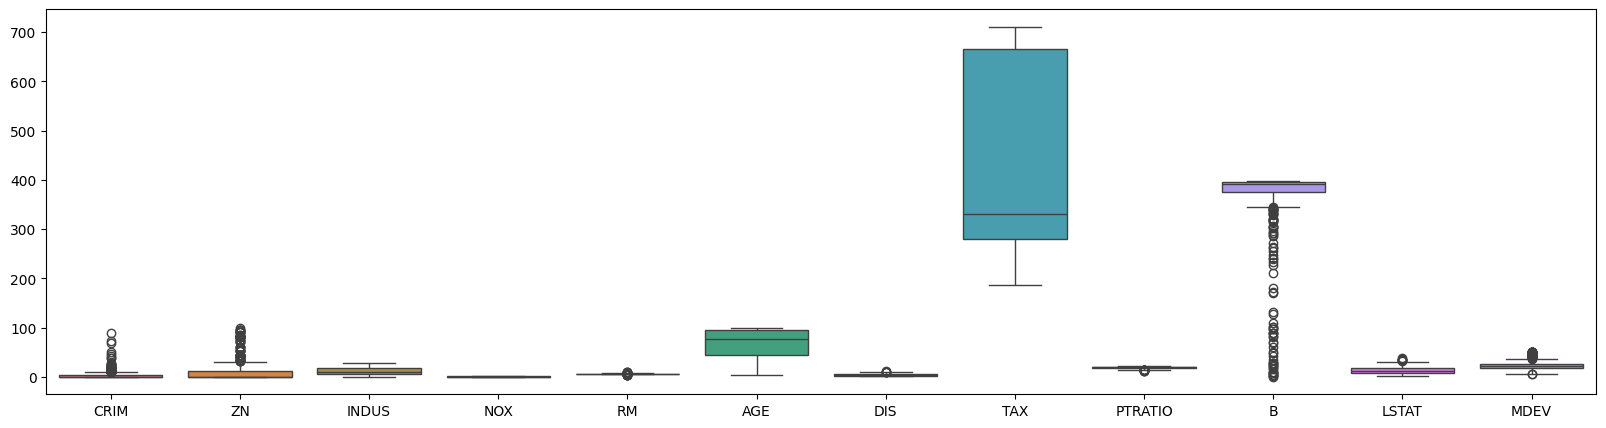

In [ ]:
plt.figure(figsize=(20, 5))
sb.boxplot(data=data)

<p align="justify">Como se puede ver, el rango de distribuci√≥n de las variables difiere bastante, donde variables como <b>TAX</b> dominan sobre el resto, indic√°ndonos esto la necesidad de <b>escalar/normalizar</b> a nuestros datos. Podemos reescalar nuestras variables de forma sencilla con el m√©todo <i>MinMaxScaler(...)</i> de Sklearn.

In [ ]:
from sklearn.preprocessing   import MinMaxScaler

# Reescalamos las variables de entrada.
Xs = MinMaxScaler().fit_transform(X)
# y tambi√©n la variable de salida.
Ys = MinMaxScaler().fit_transform(Y.values[:, np.newaxis])[:,0]

<p align="justify">Una vez tenemos nuestros datos listos, podemos proceder a modelizar los datos. Para comparar el rendimiento de las Redes Neuronales con los modelos vistos anteriormente, vamos a trabajar primero con el modelo de <b>Regresi√≥n Lineal M√∫ltiple</b>, aplicando en esta ocasi√≥n buenas pr√°cticas, como por ejemplo la de generar particiones de <i>train</i> y <i>test</i>.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_squared_error

# Generamos las particiones de entrenamiento y prueba.
X_train, X_test, Y_train, Y_test = train_test_split(Xs, Ys)

# Instanciamos al modelo de Regresi√≥n Lineal.
model = LinearRegression()

# Y lo entrenamos con nuestros datos de entrenamiento.
model.fit(X_train, Y_train)

# Una vez entrenado, evaluamos la calidad del modelo calculando
# el Error Cuadr√°tico Medio y el Coeficiente de Determinaci√≥n R2.

print('-- Linear Regression --')

print('VAL LOSS:', mean_squared_error(model.predict(X_test), Y_test))
print('R2 SCORE:',model.score(X_test, Y_test))

-- Linear Regression --
VAL LOSS: 0.009748609635036256
R2 SCORE: 0.6974167969788362


<p align="justify">Una vez entrenado el modelo de <b>Regresi√≥n Lineal M√∫ltiple</b>, al evaluarlo obtenemos un $R^2$ de ‚âà0.68. Ahora vamos a probar a entrenar a una <b>Red Neuronal Artificial</b> con </b>Sklearn</b>. Esto es bastante sencillo, pues trabajar con este modelo es casi id√©ntico a c√≥mo hemos trabajado con los modelos previos. En este caso, vamos a entrenar al √∫nico tipo de red neuronal que Sklearn nos ofrece: un <b>Multilayer Perceptron</b> <i>(MLP)</i>. Este tipo de red representa a la arquitectura est√°ndar de red neuronal, que por lo general puede ser aplicada a cualquier tipo de problema.

In [ ]:
from sklearn.neural_network import MLPRegressor

# Creamos una red MLPRegressor y la configuramos
# al gusto de nuestras necesidades.
model = MLPRegressor(activation='relu')

# La entrenamos con la participaci√≥n de entrenamiento.
model.fit(X_train, Y_train)

# Y una vez entrenada evaluamos su rendimiento.
print('-- Neural Network --')
print('VAL LOSS:', mean_squared_error(Y_test, model.predict(X_test)))
print('R2 SCORE:', model.score(X_test, Y_test))

-- Neural Network --
VAL LOSS: 0.00760717755012319
R2 SCORE: 0.7638838526476289


<p align="justify">As√≠ de simple es entrenar a una Red Neuronal con Sklearn. Pero... <b>¬øY si quisieramos tener un mayor control en el dise√±o de estas redes?</b> Si lo que queremos es poder dise√±ar redes neuronales m√°s avanzadas, y que adem√°s se vean beneficiadas en su entrenamiento de la aceleraci√≥n por hardware (e.g. <i>GPUs</i>), entonces tendremos que trabajar con otras librer√≠as, como <b>Tensorflow</b> o <b>Pytorch</b>.

<p align="justify">En nuestro caso vamos a trabajar con <b>Tensorflow</b>, y en concreto con su m√≥dulo de <b>Keras</b>, que nos permitir√° tener un acercamiento a esta librer√≠a mucho m√°s amable, a trav√©s de m√©todos y funciones que en muy pocas l√≠neas de c√≥digo nos permitir√°n poner a funcionar a nuestras redes.

<p align="justify">Una red neuronal implementada en Keras, consta de 3 partes:

- <b>Fase de dise√±o:</b> Aqu√≠ podremos definir la arquitectura de la red.<i> Cu√°ntas capas tendr√°; cu√°ntas neuronas tendr√° cada capa; qu√© funciones de activaci√≥n utilizar√°n; etc.</i>
- <b>Fase de compilaci√≥n:</b> Aqu√≠ diremos a Keras que la red ya est√° dise√±ada, y ahora, c√≥mo queremos configurarla de cara al entrenamiento. <i>Qu√© optimizador vamos a utilizar; qu√© tipo de funci√≥n de error; qu√© m√©tricas queremos visualizar, etc.</i>
- <b>Fase de entrenamiento:</b> Por √∫ltimo, en esta fase introduciremos los datos de entrenamiento y configuraremos c√≥mo ser√° este proceso.<i> Cu√°ntas √©pocas se va a entrenar; cu√°les son los datos de validaci√≥n; etc</i>

<p align="justify">Vamos a ver c√≥mo podemos hacer el dise√±o de una Red Neuronal con Keras para este ejercicio de regresi√≥n.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense

# FASE DE DISE√ëO - Para iniciar la creaci√≥n de nuestro modelo
# tenemos que crear un objeto Sequential() que nos servir√° para
# definir qu√© secuencia de capas tendr√° nuestra red neuronal.
model = Sequential()

# Una vez creado, podremos ir a√±adiendo diferentes tipos de capas
# a nuestra red. Nosotros de momento a√±adiremos capas Dense(...)
# que implementan capas de neuronas donde todas est√°n conectadas
# con las neuronas de la capa anterior (existen otro tipos de capas).
# El n√∫mero de neuronas se suele elegir de forma que vaya decrementando
# desde el n√∫mero inicial de variables, hasta el n√∫mero que tendremos
# al final. Para este problema, dos capas con 10 y 5 neuronas es suficiente.
model.add(Dense(10, activation="relu"))
model.add(Dense( 5, activation="relu"))

# La √∫ltima capa deber√° de estar configurada para que el valor que genere
# coincida con el formato de nuestra variable de salida. En este caso
# sabemos que vamos a generar un √∫nico valor, de ah√≠ el poner 1 sola neurona.
# Tambi√©n, sabemos que los valores de Y est√°n reescalados al rango de 0-1,
# y es por eso que podemos usar la funci√≥n de activaci√≥n Sigmoid, que ya
# sabemos que s√≥lo genera valores entre 0 y 1.
model.add(Dense( 1, activation="sigmoid"))

<p align="justify">Dise√±ar una red neuronal <b>no es una ciencia exacta</b>, y es por ello que en muchos casos no existen pautas definidas para saber cu√°ntas capas o neuronas elegir. Pero orientativamente, el dise√±o suele tener en cuenta esto:

- <p align="justify">El n√∫mero de neuronas decrementa desde el Input al Output. Si tenemos 13 variables de entrada y 1 de salida, las capas intermedias ir√°n decrementando proporcionalmente el n√∫mero de neuronas.

- <p align="justify">El n√∫mero de capas va en funci√≥n de la complejidad del problema y la cantidad de datos con los que contamos. A√±adir capas en exceso, significa a√±adir m√°s par√°metros y por tanto correr el riesgo de mayor presencia de <i>Overfitting</i>.

- <p align="justify">La funci√≥n de activaci√≥n <i>ReLU</i> para las capas intermedias es la mejor opci√≥n de forma general. Favorece un entrenamiento m√°s r√°pido.

- <p align="justify">La √∫ltima capa deber√° de estar configurada para que los valores que genere se aproximen al formato de nuestras variables de salida. Como en este caso sabemos que generamos un s√≥lo valor cuyo rango va de 0 a 1, podemos configurarla con una √∫nica neurona y una funci√≥n de activaci√≥n <i>Sigmoid</i>.

In [ ]:
# FASE DE COMPILACI√ìN - En este punto podemos elegir el algoritmo de optimizaci√≥n
# a utilizar durante el entrenamiento y su Ratio de Aprendizaje. Tambi√©n la m√©trica
# a optimizar, que en este caso ser√° el Error Cuadr√°tico Medio (MSE)

model.compile(optimizer=Adam(learning_rate=0.005), loss="mse")

# FASE DE ENTRENAMIENTO - Aqu√≠ suministramos los datos de entrada y salida a nuestro
# modelo, tanto en su partici√≥n de entrenamiento como de validaci√≥n.
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 12ms/step - loss: 0.0053 - val_loss: 0.0058
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0059
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss: 0.0058
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.0058
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0063
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0045 - val_loss: 0.0058
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0043 - val_loss: 0.0060
Epoch 8/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.0058
Epoch 9/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 0.0067
Epoch 10/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0062
Epoch 11

In [ ]:
from sklearn.metrics import r2_score

print('-- Neural Network (KERAS)--')
print('VAL LOSS:', mean_squared_error(Y_test, model.predict(X_test)))
print('R2 SCORE:',           r2_score(Y_test, model.predict(X_test)))

-- Neural Network (KERAS)--
4/4 [==============================] - 0s 3ms/step
VAL LOSS: 0.006420896417833189
4/4 [==============================] - 0s 3ms/step
R2 SCORE: 0.8007043591742037


<p align="justify">As√≠ vemos que en muy pocas l√≠neas de c√≥digo hemos podido dise√±ar y entrenar a una red neuronal cuyo rendimiento parece superar al que hemos obtenido antes con Sklearn, con un $R^2$ de 0.82.

## **Clasificaci√≥n con Redes Neuronales Artificiales**

<p align="justify">Ya hemos visto c√≥mo podemos dise√±ar redes neuronales para resolver un problema de regresi√≥n. Ahora vamos a ver c√≥mo podemos hacer el mismo dise√±o pero para la resoluci√≥n de un problema de clasificaci√≥n. Ahora ver√°s que no hay muchas diferencias. En esta ocasi√≥n, el dataset elegido ser√° el de las botellas de vino.

In [ ]:
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

# Cargamos los datos.
wine_data = load_wine()

# Generamos las variables de entrada y salida.
X = wine_data.data
Y = wine_data.target

# Creamos un DataFrame de Pandas con todos nuestros datos.
data = pd.DataFrame(X, columns=wine_data.feature_names)

# A√±adimos a la tabla tambi√©n la columna de salida Y.
data["wine_type"] = Y

# Visualizamos el contenido de la tabla.
display(data)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  wine_type  
0                            3.92   1065.0          0  
1                            3.40   1050.0          0  
2                            3.17   1185.0          0  
3                            3.45   1480.0          0  
4                            2.93    735.0          0  
..                            ...      ...        ...  
173                          1.74    740.0          2  
174                          1.56    750.0          2  
175                          1.56    835.0          2  
176                          1.62    840.0          2  
177                          1.60    560.0          2  

[178 rows x 14 columns]

<Axes: >

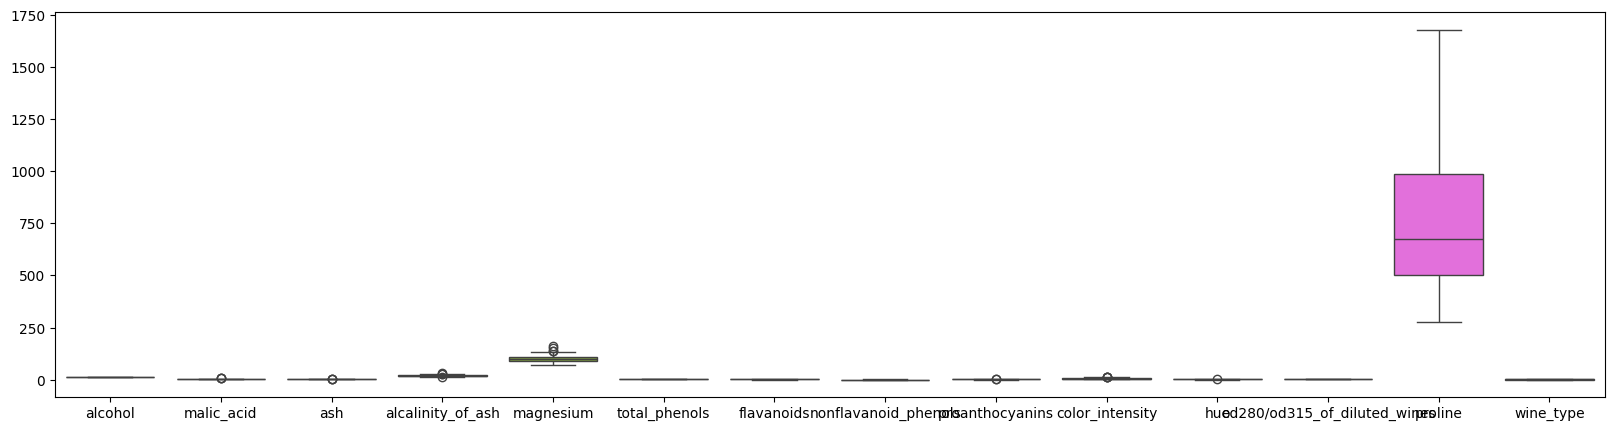

In [ ]:
# Visualizamos con un Boxplot la escala de las variables.
plt.figure(figsize=(20, 5))
sb.boxplot(data=data)

<p align="justify">Veamos ahora c√≥mo es el dise√±o de la red neuronal para el problema de clasificaci√≥n. Una primera diferencia obvia, es que ahora no vamos a reescalar la variable de salida, puesto que en esta ocasi√≥n se trata de una variable categ√≥rica. Lo que s√≠ tenemos que modificar es su codificaci√≥n, para que en vez de venir representada por una etiqueta num√©rica se codifique con vectores tipo <b>One-Hot Encoding</b>. Esto se puede conseguir de forma muy sencilla con el m√©todo <i>to_categorical(...)</i> de Keras.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.preprocessing   import MinMaxScaler
from tensorflow.keras.utils  import to_categorical

# Escalamos las variables de entrada.
Xs = MinMaxScaler().fit_transform(X)
# Codificamos a One-Hot Encoding la salida.
Ye = to_categorical(Y)

# Visualizamos el output codificado con One-Hot Encoding.
print("-- Codificaci√≥n One-Hot Encoding --\n\n", Ye[np.random.choice(178, 5)])

# Particionamos los datos en datos de entrenamiento y test.
X_train, X_test, Y_train, Y_test = train_test_split(Xs, Ye)

-- Codificaci√≥n One-Hot Encoding --

 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
# Generamos al modelo.
model = Sequential()

# A√±adimos las capas intermedias.
model.add(Dense(10, activation="relu"))
model.add(Dense( 4, activation="relu"))

# La √∫ltima capa ahora tendr√° que estar configurada para generar vectores de 3
# componentes que se aproximen al formato de One-Hot Encoding. Es por ello que
# definimos 3 neuronas, y una funci√≥n de activaci√≥n Softmax, cuyas propiedades
# son la de generar vectores de valores entre 0 y 1, y donde adem√°s todas las
# componentes suman 1 (son vectores de probabilidad).
model.add(Dense( 3, activation="softmax"))

# Una vez est√° la red dise√±ada, configuramos al optimizador. En este caso la
# √∫nica diferencia que a√±ado es la de visualizar la m√©trica Accuracy durante
# el entrenamiento, que en el contexto del problema de clasificaci√≥n es m√°s
# informativa que el Error Cuadr√°tico Medio (MSE).
model.compile(optimizer=Adam(learning_rate=0.005), loss="mse", metrics=["acc"])

# Y comenzamos el entrenamiento de la red neuronal.
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

Epoch 1/100
5/5 [==============================] - 3s 224ms/step - loss: 0.2068 - acc: 0.4737 - val_loss: 0.2058 - val_acc: 0.5333
Epoch 2/100
5/5 [==============================] - 0s 39ms/step - loss: 0.1991 - acc: 0.5414 - val_loss: 0.2007 - val_acc: 0.5556
Epoch 3/100
5/5 [==============================] - 0s 48ms/step - loss: 0.1925 - acc: 0.6241 - val_loss: 0.1974 - val_acc: 0.6000
Epoch 4/100
5/5 [==============================] - 0s 39ms/step - loss: 0.1864 - acc: 0.6541 - val_loss: 0.1920 - val_acc: 0.6000
Epoch 5/100
5/5 [==============================] - 0s 37ms/step - loss: 0.1806 - acc: 0.6466 - val_loss: 0.1855 - val_acc: 0.6000
Epoch 6/100
5/5 [==============================] - 0s 28ms/step - loss: 0.1744 - acc: 0.6842 - val_loss: 0.1808 - val_acc: 0.6444
Epoch 7/100
5/5 [==============================] - 0s 28ms/step - loss: 0.1684 - acc: 0.6842 - val_loss: 0.1737 - val_acc: 0.6444
Epoch 8/100
5/5 [==============================] - 0s 19ms/step - loss: 0.1613 - acc: 0.6

R√°pidamente vemos que el modelo es capaz de alcanzar una tasa de acierto del 100% sobre los datos de validaci√≥n. De esta manera comprobamos qu√© tan sencillo es dise√±ar y entrenar redes neuronales funcionales con Keras.

# **Actividad Evaluable 2.** Redes Neuronales Artificiales.

<img src="https://datasets.activeloop.ai/wp-content/uploads/2019/12/MNIST-handwritten-digits-dataset-visualized-by-Activeloop.webp" width=600px>

<p align="justify">Uno de los datasets m√°s trabajados dentro del mundo de las Redes Neuronales es el <b>MNIST</b>. Un dataset conformado por im√°genes de <i>28x28</i> p√≠xeles de n√∫meros escritos a mano y digitalizados, que ahora deberemos de aprender a clasificar <i>(similar al trabajo del Bloque 5)</i>. Hoy nuestra misi√≥n ser√° aplicar el conocimiento aprendido en el dise√±o de Redes Neuronales con <b>Keras</b> para entrenar a nuestro clasificador.

---

**Tu tarea:** Completa las siguientes tareas de an√°lisis aplicadas sobre el dataset MNIST:

1. <p align="justify">Preprocesa las variables de entrada para que su rango de valores del input est√© escalado a 0-1, y para que las variables de salida est√©n codificadas a vectores <i>One-Hot Encoding</i>. Tambi√©n modifica las dimensiones de las variables de entrada para que las im√°genes con dimensiones <i>(n_img, 28, 28),</i> queden representadas en forma de tabla con dimensiones <i>(n_img, 784)</i>.

2. <p align="justify">Dise√±a y entrena a una Red Neuronal con Keras que sea capaz de clasificar estas im√°genes con una <b>tasa de acierto superior al 90%.</b>

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.3842 - accuracy: 0.8912 - val_loss: 0.1875 - val_accuracy: 0.9462
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1525 - accuracy: 0.9539 - val_loss: 0.1378 - val_accuracy: 0.9586
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1069 - accuracy: 0.9683 - val_loss: 0.1269 - val_accuracy: 0.9625
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0816 - accuracy: 0.9754 - val_loss: 0.1056 - val_accuracy: 0.9687
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0656 - accuracy: 0.9801 - val_loss: 0.1020 - val_accuracy: 0.9700
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0511 - accuracy: 0.9850 - val_loss: 0.0891 - val_accuracy: 0.9730
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0406 - accuracy: 0.9881 - val_loss: 0.0938 - val_accuracy: 0.9714
Epoch 

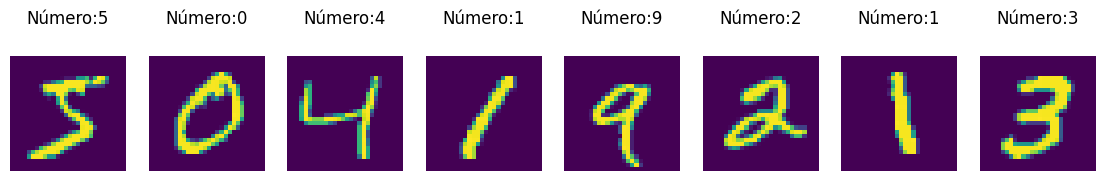

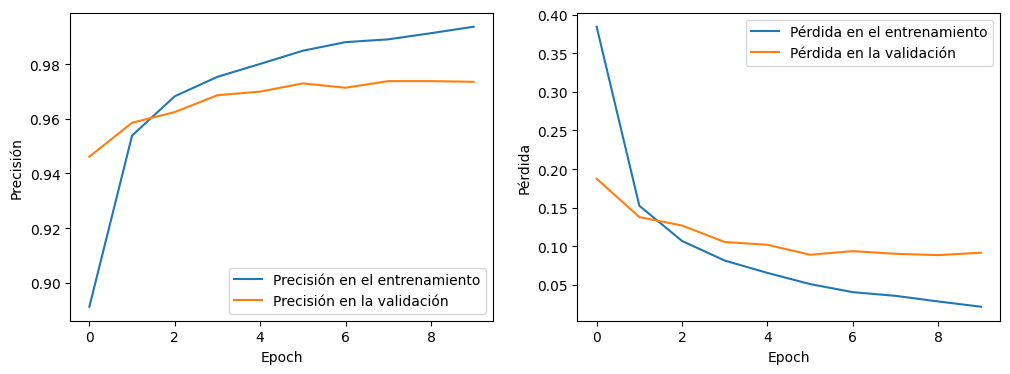

In [14]:
from tensorflow.keras.datasets import mnist

# Cargamos el dataset MNIST desde la librer√≠a de Keras.
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Visualizamos alguno de los n√∫meros del dataset.
fig, axs = plt.subplots(1, 8, figsize=(14, 2))
for i in range(len(axs)):
  axs[i].matshow(X_train[i])                     # Visualiza el n√∫mero.
  axs[i].set_title('N√∫mero:' + str(Y_train[i]))  # A√±ade un t√≠tulo descriptivo.
  axs[i].axis('off')                             # Oculta los ejes de la gr√°fica.


# COMIENZA AQU√ç TU C√ìDIGO

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Preprocesamiento de los datos
# Escalar los valores de las im√°genes a 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Redimensionar las im√°genes de (n_img, 28, 28) a (n_img, 784)
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

# Convertir las etiquetas a One-Hot Encoding
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# Dise√±o de la red neuronal
model = Sequential()
model.add(Flatten(input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilaci√≥n del modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluaci√≥n del modelo
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Gr√°fica de precisi√≥n y p√©rdida
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisi√≥n en el entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisi√≥n en la validaci√≥n')
plt.xlabel('Epoch')
plt.ylabel('Precisi√≥n')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='P√©rdida en el entrenamiento')
plt.plot(history.history['val_loss'], label='P√©rdida en la validaci√≥n')
plt.xlabel('Epoch')
plt.ylabel('P√©rdida')
plt.legend()

plt.show()
